# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Set units to Farenheit
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | baruun-urt
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | el bauga
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | wietmarschen
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | sungai penuh
Processing Record 15 of Set 1 | hayma'
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | hafar al-batin
Processing Record 21 of Set 1 | ust-nera
Processing 

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            578
Lat             578
Lng             578
Max Temp (F)    578
Humidity        578
Cloudiness      578
Wind Speed      578
Country         578
Date            578
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,70.21,78,75,17.27,AU,1704749064
1,baruun-urt,46.6806,113.2792,-11.54,94,24,4.74,MN,1704749066
2,port-aux-francais,-49.3500,70.2167,41.54,80,92,27.20,TF,1704749066
3,edinburgh of the seven seas,-37.0676,-12.3116,65.25,92,100,29.06,SH,1704749067
4,blackmans bay,-43.0167,147.3167,59.13,75,86,3.74,AU,1704749067


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,70.21,78,75,17.27,AU,1704749064
1,baruun-urt,46.6806,113.2792,-11.54,94,24,4.74,MN,1704749066
2,port-aux-francais,-49.3500,70.2167,41.54,80,92,27.20,TF,1704749066
3,edinburgh of the seven seas,-37.0676,-12.3116,65.25,92,100,29.06,SH,1704749067
4,blackmans bay,-43.0167,147.3167,59.13,75,86,3.74,AU,1704749067


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

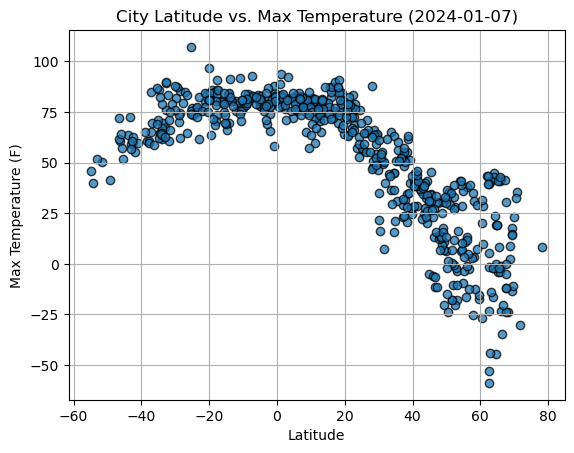

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (F)"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-01-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

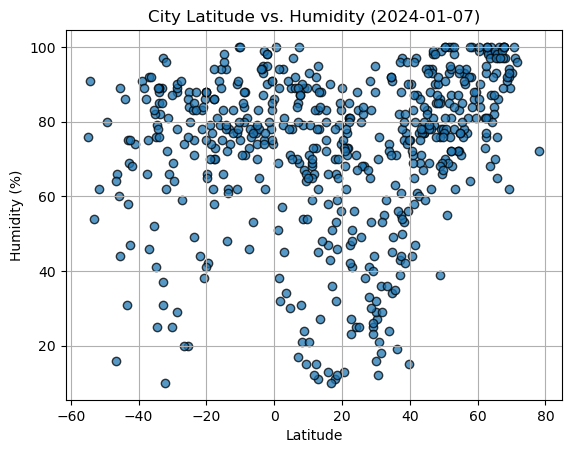

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

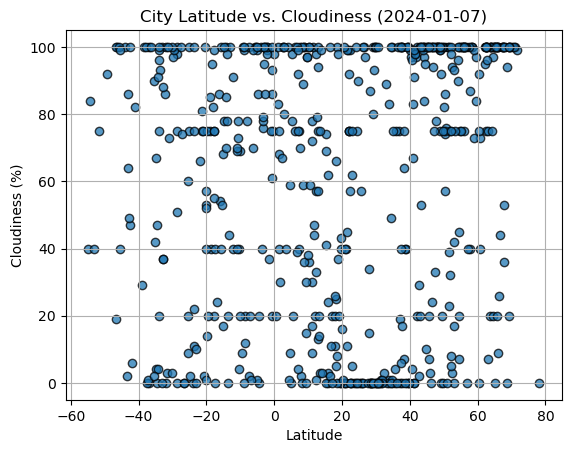

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

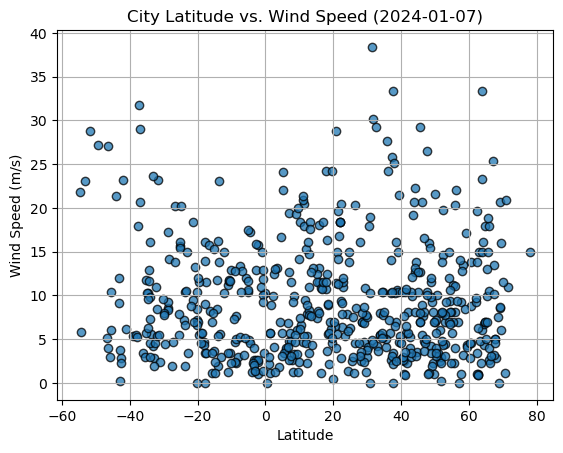

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def RegressionPlot(x, y, title, ylabel, eq_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_coordinates),fontsize=12,color="red")
    plt.title(f"Latitude vs. {title}")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.grid(True)
    
    print(f"The correlation between Latitude & {title} on Jan 7, 2024 is r = {rvalue}")
    plt.show()

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,baruun-urt,46.6806,113.2792,-11.54,94,24,4.74,MN,1704749066
6,el bauga,18.2620,33.9081,75.00,53,5,12.39,SD,1704749068
7,whitehorse,60.7161,-135.0538,9.81,84,40,13.80,CA,1704749069
8,wietmarschen,52.5333,7.1333,27.95,68,3,14.67,DE,1704749071
11,ilulissat,69.2167,-51.1000,17.62,62,20,20.71,GL,1704749073


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,70.21,78,75,17.27,AU,1704749064
2,port-aux-francais,-49.3500,70.2167,41.54,80,92,27.20,TF,1704749066
3,edinburgh of the seven seas,-37.0676,-12.3116,65.25,92,100,29.06,SH,1704749067
4,blackmans bay,-43.0167,147.3167,59.13,75,86,3.74,AU,1704749067
5,grytviken,-54.2811,-36.5092,39.88,91,84,5.82,GS,1704749068


### Latitude vs Temperature Linear Regression Plot

The correlation between Latitude & Max Temperature (N. Hemisphere) on Jan 7, 2024 is r = -0.8560778863701664


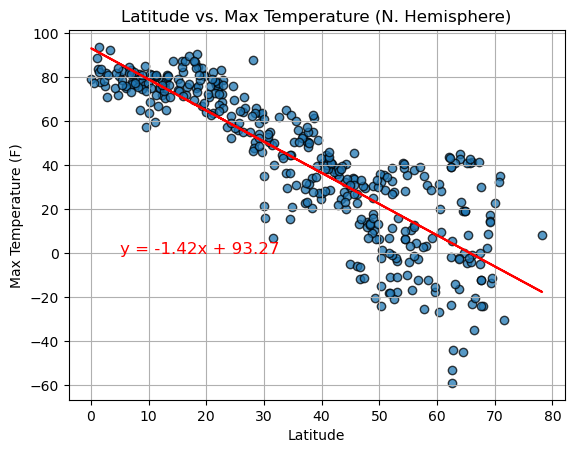

In [59]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp (F)"]
title = "Max Temperature (N. Hemisphere)"
ylabel= "Max Temperature (F)"
eq_coordinates = [5,0]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

The correlation between Latitude & Max Temperature (S. Hemisphere) on Jan 7, 2024 is r = 0.598226152673418


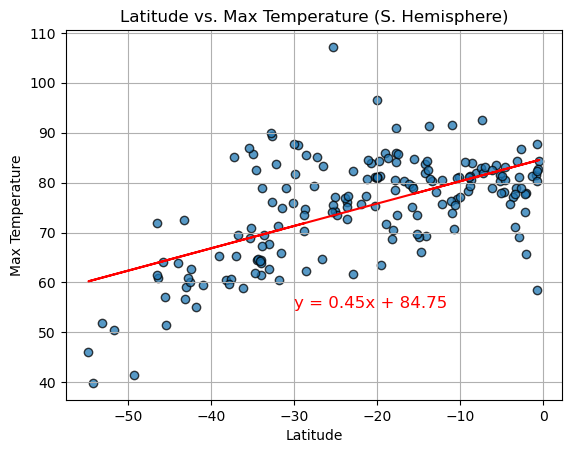

In [60]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp (F)"]
title = "Max Temperature (S. Hemisphere)"
ylabel = "Max Temperature"
eq_coordinates = [-30, 55]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

**Discussion about the linear relationship:** There appears to be a strong negative correlation between Latitude and Max Temperature (F) in the Northern Hemisphere with r = -0.86 on January 7, 2024. In addition, there appears to be a moderate correlation between Latitude and Max Temperature (F) in the Southern Hemisphere with r = 0.60.

### Humidity vs. Latitude Linear Regression Plot

The correlation between Latitude & Humidity (N. Hemisphere) on Jan 7, 2024 is r = 0.4176556364177171


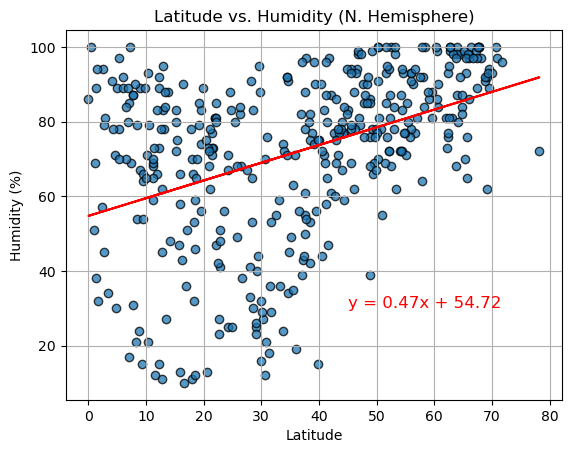

In [67]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
title = "Humidity (N. Hemisphere)"
ylabel = "Humidity (%)"
eq_coordinates = [45,30]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

The correlation between Latitude & Humidity (S. Hemisphere) on Jan 7, 2024 is r = 0.27503365836928206


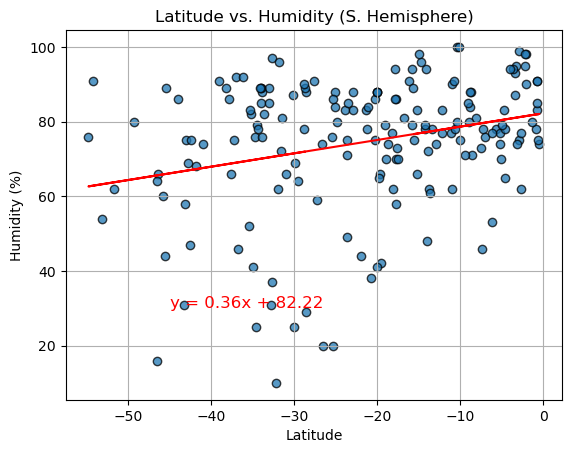

In [68]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

title = "Humidity (S. Hemisphere)"
ylabel = "Humidity (%)"
eq_coordinates = [-45,30]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

**Discussion about the linear relationship:** There appears to be a weak correlation between Latitude and Humidity (%) in the Northern Hemisphere with r = 0.42 on January 7, 2024. In addition, there is no correlation or a very weak correlation between Latitude and Humidity (%) in the Southern Hemisphere with r = - 0.28.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Latitude & Cloudiness (N. Hemisphere) on Jan 7, 2024 is r = 0.25093979267687977


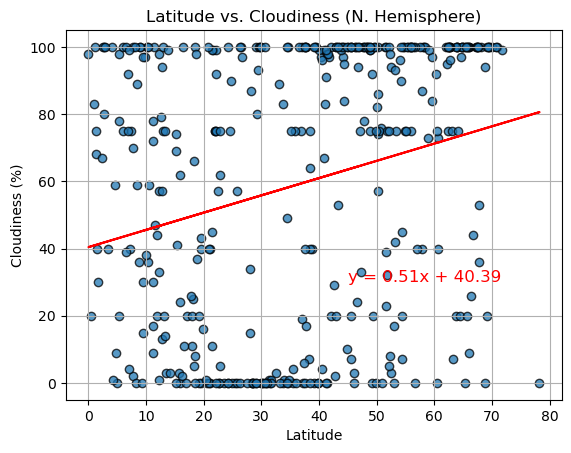

In [63]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

title = "Cloudiness (N. Hemisphere)"
ylabel = "Cloudiness (%)"
eq_coordinates = [45,30]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

The correlation between Latitude & Cloudiness (S. Hemisphere) on Jan 7, 2024 is r = 0.07451460350650385


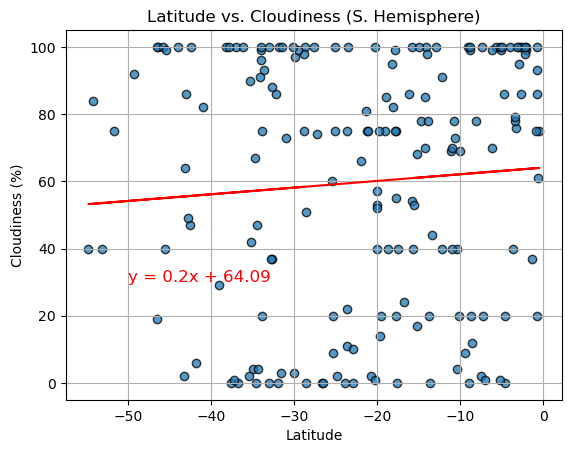

In [64]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

title = "Cloudiness (S. Hemisphere)"
ylabel = "Cloudiness (%)"
eq_coordinates = [-50,30]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

**Discussion about the linear relationship:** There appears to be no correlation or a very weak correlation between Latitude and Cloudiness (%) in the Northern Hemisphere with r = 0.25 on January 7, 2024. In addition, there does not appear to be a correlation between Latitude and Cloudiness (%) in the Southern Hemisphere with r = 0.07.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Latitude & Wind Speed (N. Hemisphere) on Jan 7, 2024 is r = -0.010413591948910419


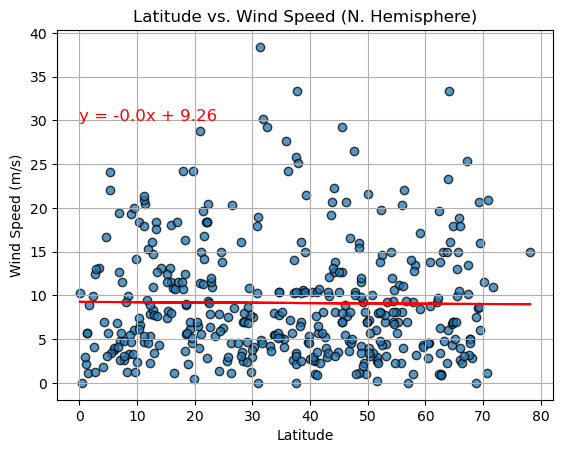

In [69]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

title = "Wind Speed (N. Hemisphere)"
ylabel = "Wind Speed (m/s)"
eq_coordinates = [0,30]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

The correlation between Latitude & Wind Speed (S. Hemisphere) on Jan 7, 2024 is r = -0.2477982134551176


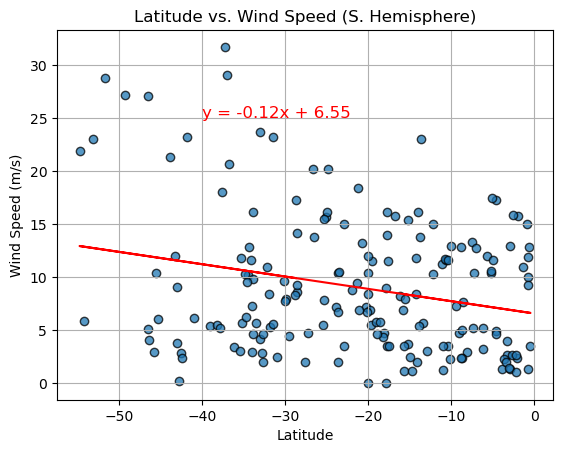

In [66]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

title = "Wind Speed (S. Hemisphere)"
ylabel = "Wind Speed (m/s)"
eq_coordinates = [-40,25]

RegressionPlot(x, y, title, ylabel, eq_coordinates)

**Discussion about the linear relationship:** There appears to be no correlation correlation between Latitude and Wind Speed (m/s) in the Northern Hemisphere with r = 0.01 on January 7, 2024. In addition, there appears to be no correlation or a very weak negative correlation between Latitude and Wind Speed (m/s) in the Southern Hemisphere with r = - 0.25. 